In [ ]:
# importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection And Processing

In [ ]:
# loading a csv data to pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
 # printing the first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# printing the last five rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


SPX = capatitalization of 500 companies

GLD = Gold Price

USO = United State oil price

SLV = Silver price

EUR/USD = currency pair of europe and us

In [ ]:
# shape of the dataset
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing value
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :

1. Positive Correlation

2. Negative correlation

In [ ]:
correlation = gold_data.drop(columns=['Date']).corr()


<Axes: >

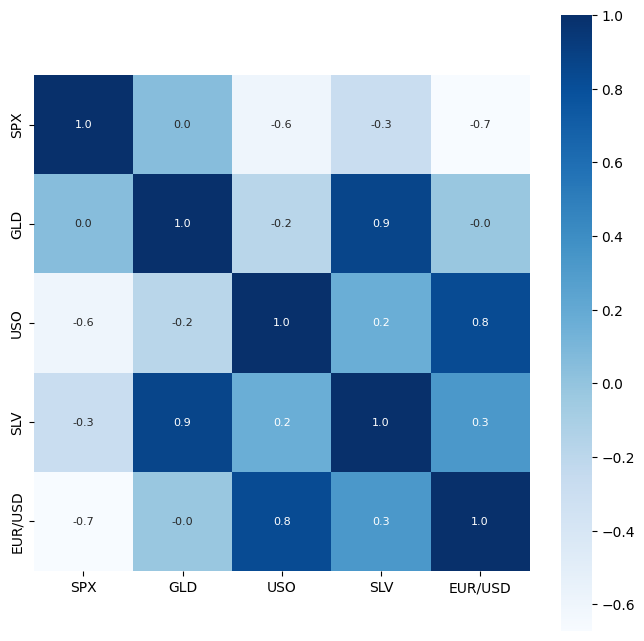

In [ ]:
# constructing the heatmap to unnderstand the correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, square = True, fmt = '.1f',annot = True,annot_kws= {'size':8},cmap = 'Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-58-7d0465c811c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color ='green')


<Axes: xlabel='GLD', ylabel='Density'>

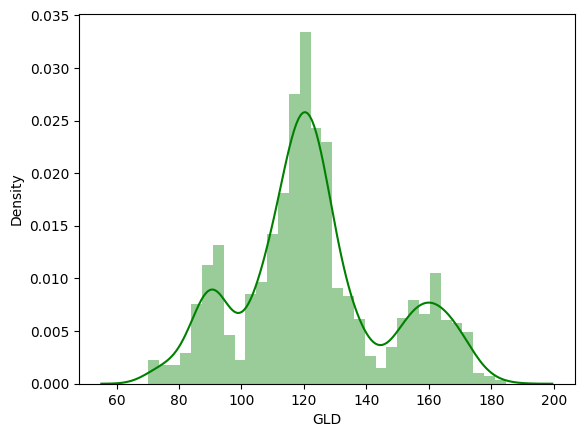

In [ ]:
# check the deistribution of gold price
sns.distplot(gold_data['GLD'],color ='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

Model Training Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.39719941  81.95499979 115.84380056 127.68400036 120.72800147
 154.77199766 150.34309853 126.01180058 117.53269907 125.913801
 116.70510131 171.53960052 141.26019854 167.94739937 115.33669994
 117.71350066 136.52880325 169.9908005  159.60220312 159.06339957
 155.00170037 125.08519968 175.96429956 157.07680376 125.15230031
  93.79049965  78.16730048 120.22380011 119.0606992  167.54379895
  88.20720043 125.16149985  91.1189007  117.70680035 121.09759921
 136.09120095 115.42240115 115.0374005  147.87700031 107.12940102
 104.6625024   87.31399836 126.60490057 117.81800012 152.54819843
 119.64090009 108.48839958 107.99969862  93.28880058 127.01899775
  75.03880042 113.71969942 121.54820009 111.31319914 118.8639989
 120.59579956 158.47380058 167.50670073 146.69219631  85.9112987
  94.2831003   86.72559899  90.56690002 119.0364009  126.40660062
 127.52090009 169.56479949 122.31739937 117.40339874  98.87910036
 168.43930106 142.78639839 132.1792026  121.23060225 120.92719983
 119.69130052 

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893577881230644


In [ ]:
Y_test = list(Y_test)

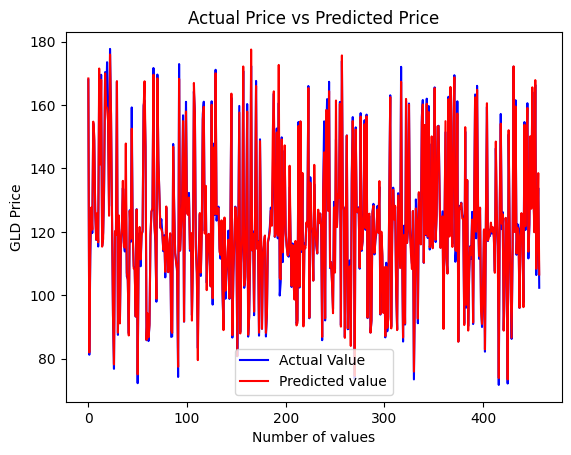

In [ ]:
plt.plot(Y_test,color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction,color = 'red',label = 'Predicted value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()